로지스틱 회귀-유방암
==
- 로지스틱회귀의 개념
- BreastCancer.csv

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [18]:
X = np.concatenate((pass_time, fail_time))  # 아래와 동일
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

X = np.hstack((pass_time,fail_time))          # stack horizontally
X

In [4]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

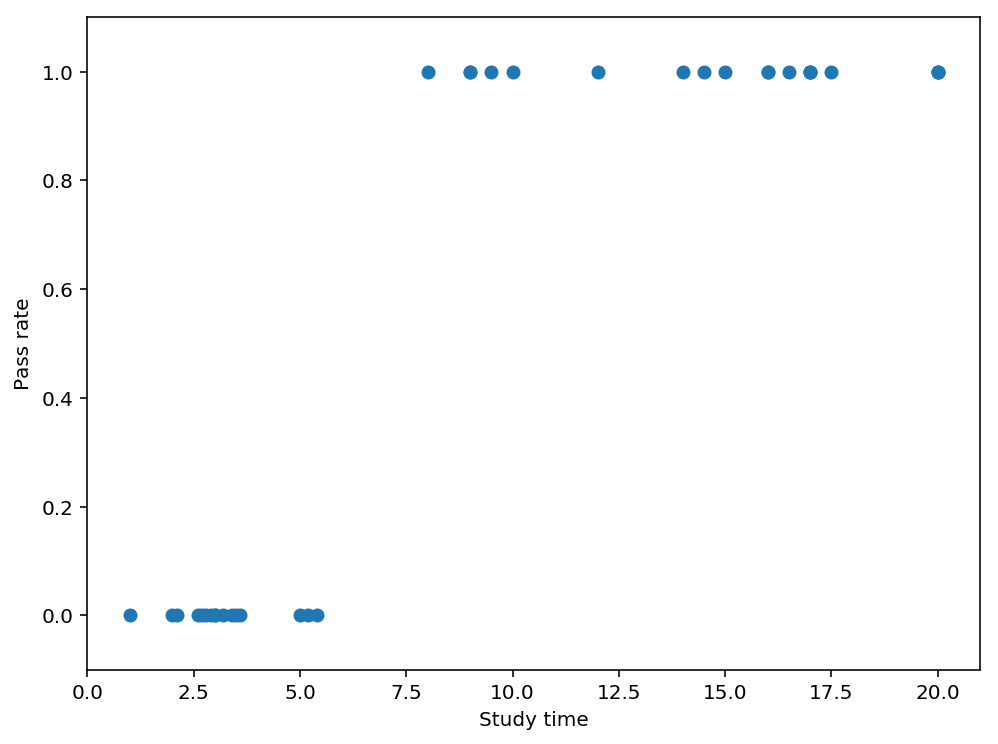

In [5]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X, y)
plt.show()

In [6]:
model = LogisticRegression()
model.fit(X.reshape(-1, 1),y)

print(model.coef_)
print(model.intercept_)

[[0.40606369]]
[-2.47960598]


C:\Users\rta_note\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
model.predict(np.array([6.9]).reshape(-1,1))

array([1])

In [8]:
model.predict_proba(np.array([7.9]).reshape(-1,1))

array([[0.32556852, 0.67443148]])

NameError: name 'y' is not defined

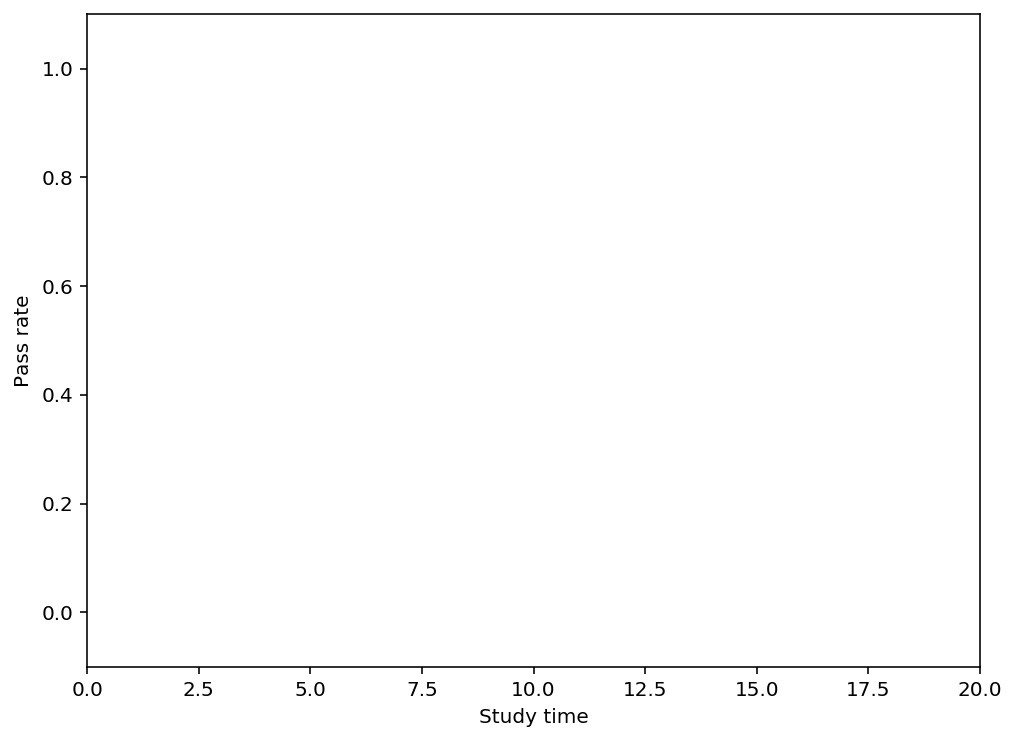

In [14]:
def logreg(z):    # also known as Sigmoid function
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)

XX = np.linspace(0.5, 21, 100)
yy = logreg(model.coef_*XX + model.intercept_)[0]  # model.coef_ is returned in (1,)
print(model.coef_, model.intercept_)
# print(XX, "\n-----------\n", yy)
plt.plot(XX, yy, c='r')
plt.show()

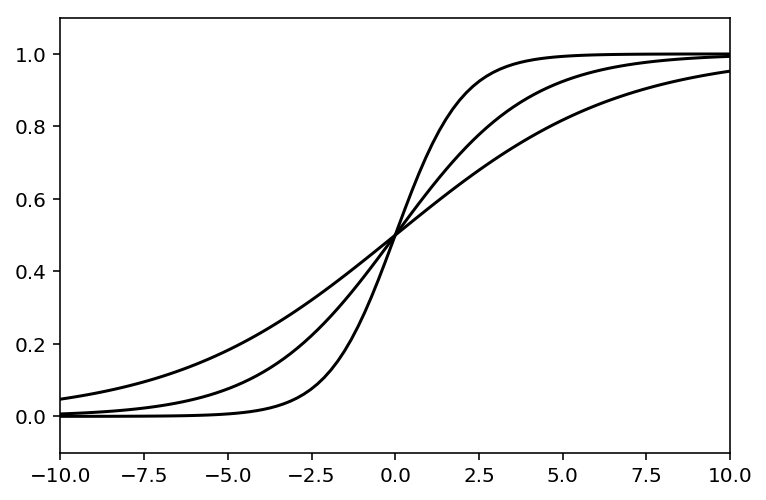

In [10]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b_list = [0]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

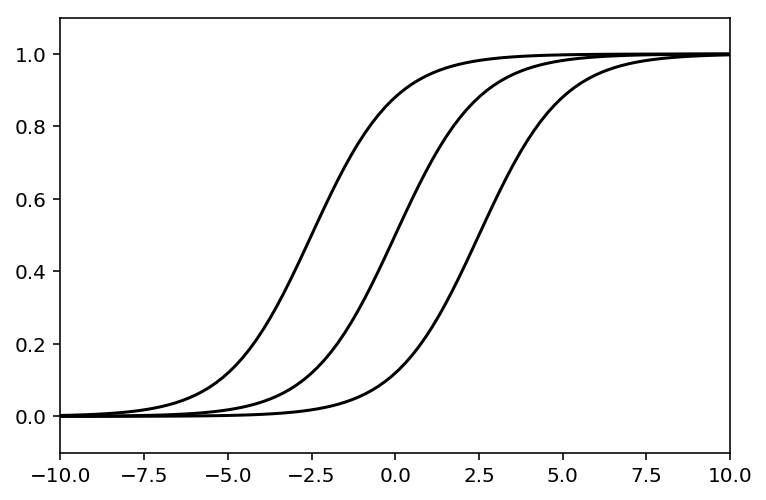

In [11]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.8]
b_list = [-2, 0, 2]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

### Breast Cancer Exmple 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import KFold   # K-fold cross validation
from sklearn.model_selection import KFold   # K-fold cross validation
from sklearn import metrics

In [13]:
# data can be downloaded from https://qoo.ql/u9yHpQ (not available anymore)
# download from Kaggle site (breast_cancer.csv of Wisconsin)
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/data.csv/data

#### Features
- id: ID number
- diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
- radius_mean: mean of distances from center to points on the perimeter
- texture_mean: standard deviation of gray-scale values
- perimeter_mean: mean size of the core tumor
- area_mean
- smoothness_mean: mean of local variation in radius lengths
- compactness_mean: mean of perimeter^2 / area - 1.0
- concavity_mean: mean of severity of concave portions of the contour
- concave points_mean: mean for number of concave portions of the contour
- symmetry_mean
- fractal_dimension_mean: mean for "coastline approximation" - 1
- radius_se: standard error for the mean of distances from center to points on the perimeter
- texture_se: standard error for standard deviation of gray-scale values
- perimeter_se
- area_se
- smoothness_se: standard error for local variation in radius lengths
- compactness_se: standard error for perimeter^2 / area - 1.0
- concavity_se: standard error for severity of concave portions of the contour
- concave points_sestandard error for number of concave portions of the contour
symmetry_se
- fractal_dimension_se: standard error for "coastline approximation" - 1
- radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
- texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
- perimeter_worst
- area_worst
- smoothness_worst: "worst" or largest mean value for local variation in radius lengths
- compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
- concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
- concave points_worst: "worst" or largest mean value for number of concave portions of the contour
- symmetry_worst
- fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

In [102]:
data = pd.read_csv('data/breast_cancer.csv')
print(data.shape)
# data.head().T

(569, 32)


In [103]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0}) # malignant, benign

In [81]:
# data.head().T

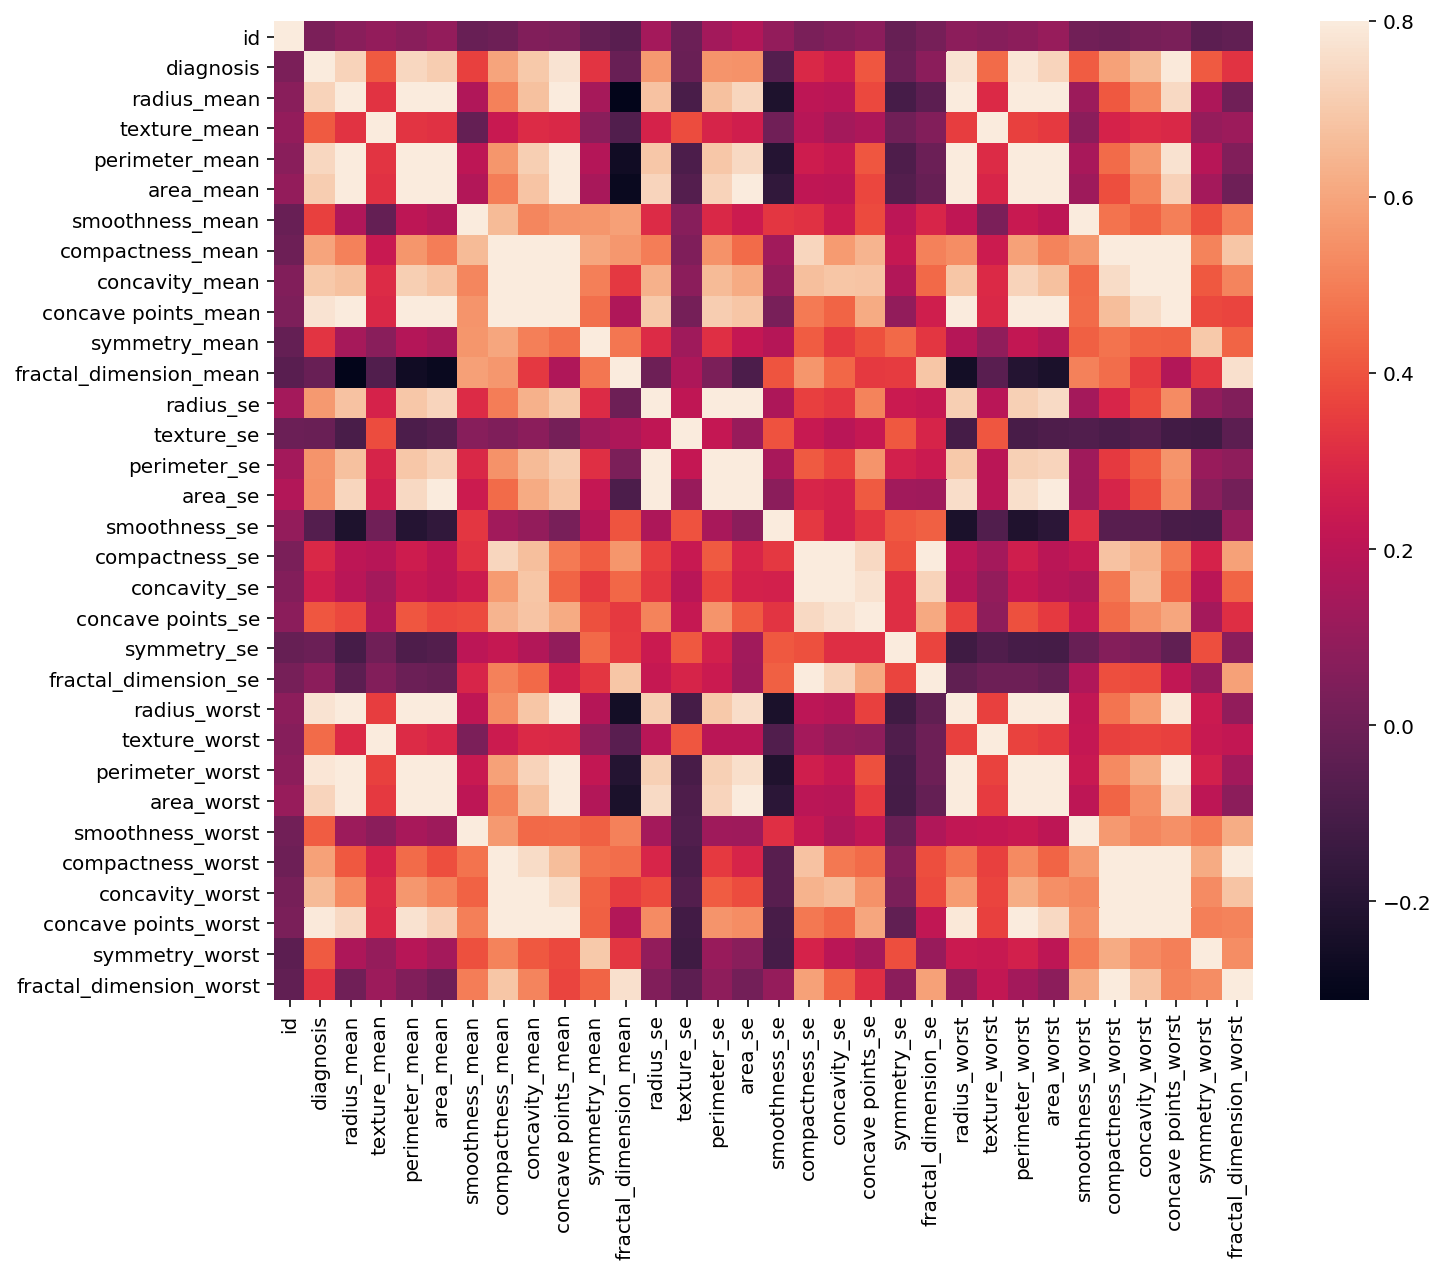

In [82]:
corrmat = data.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [100]:
corrmat.nlargest(5, 'diagnosis').index   # just for checking

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst'],
      dtype='object')

In [84]:
corrmat.sort_values(by='diagnosis', ascending=False).head()   # just for checking

id  diagnosis  radius_mean  texture_mean  \
diagnosis             0.039769   1.000000     0.730029      0.415185   
concave points_worst  0.035174   0.793566     0.744214      0.295316   
perimeter_worst       0.079986   0.782914     0.965137      0.358040   
concave points_mean   0.044158   0.776614     0.822529      0.293464   
radius_worst          0.082405   0.776454     0.969539      0.352573   

                      perimeter_mean  area_mean  smoothness_mean  \
diagnosis                   0.742636   0.708984         0.358560   
concave points_worst        0.771241   0.722017         0.503053   
perimeter_worst             0.970387   0.959120         0.238853   
concave points_mean         0.850977   0.823269         0.553695   
radius_worst                0.969476   0.962746         0.213120   

                      compactness_mean  concavity_mean  concave points_mean  \
diagnosis                     0.596534        0.696360             0.776614   
concave points_worst          0.815573        0.861323             0.910155   
perimeter_worst               0.590210        0.729565             0.855923   
concave points_mean           0.831135        0.921391             1.000000   
radius_worst                  0.535315        0.688236             0.830318   

                      ...  radius_worst  texture_worst  perimeter_worst  \
diagnosis             ...      0.776454       0.456903         0.782914   
concave points_worst  ...      0.787424       0.359755         0.816322   
perimeter_worst       ...      0.993708       0.365098         1.000000   
concave points_mean   ...      0.830318       0.292752         0.855923   
radius_worst          ...      1.000000       0.359921         0.993708   

                      area_worst  smoothness_worst  compactness_worst  \
diagnosis               0.733825          0.421465           0.590998   
concave points_worst    0.747419          0.547691           0.801080   
perimeter_worst         0.977578          0.236775           0.529408   
concave points_mean     0.809630          0.452753           0.667454   
radius_worst            0.984015          0.216574           0.475820   

                      concavity_worst  concave points_worst  symmetry_worst  \
diagnosis                    0.659610              0.793566        0.416294   
concave points_worst         0.855434              1.000000        0.502528   
perimeter_worst              0.618344              0.816322        0.269493   
concave points_mean          0.752399              0.910155        0.375744   
radius_worst                 0.573975              0.787424        0.243529   

                      fractal_dimension_worst  
diagnosis                            0.323872  
concave points_worst                 0.511114  
perimeter_worst                      0.138957  
concave points_mean                  0.368661  
radius_worst                         0.093492  

[5 rows x 32 columns]

In [104]:
df = data[["diagnosis", "radius_mean", "texture_mean"]]
df.head()

diagnosis  radius_mean  texture_mean
0          1        17.99         10.38
1          1        20.57         17.77
2          1        19.69         21.25
3          1        11.42         20.38
4          1        20.29         14.34

In [105]:
model=LogisticRegression()
y = df["diagnosis"]

In [106]:
features = ["radius_mean"]
X = df[features]
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 85.96%


C:\Users\rta_note\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [107]:
# print 연습
for x in range(1, 11):
    print('{0:2d} {1:3d} {2:4d}'.format(x, x*x, x*x*x))

 1   1    1
 2   4    8
 3   9   27
 4  16   64
 5  25  125
 6  36  216
 7  49  343
 8  64  512
 9  81  729
10 100 1000


In [108]:
X_test.shape

(171, 1)

In [109]:
print(model.coef_)
print(model.intercept_)

[[0.48325363]]
[-7.3485004]


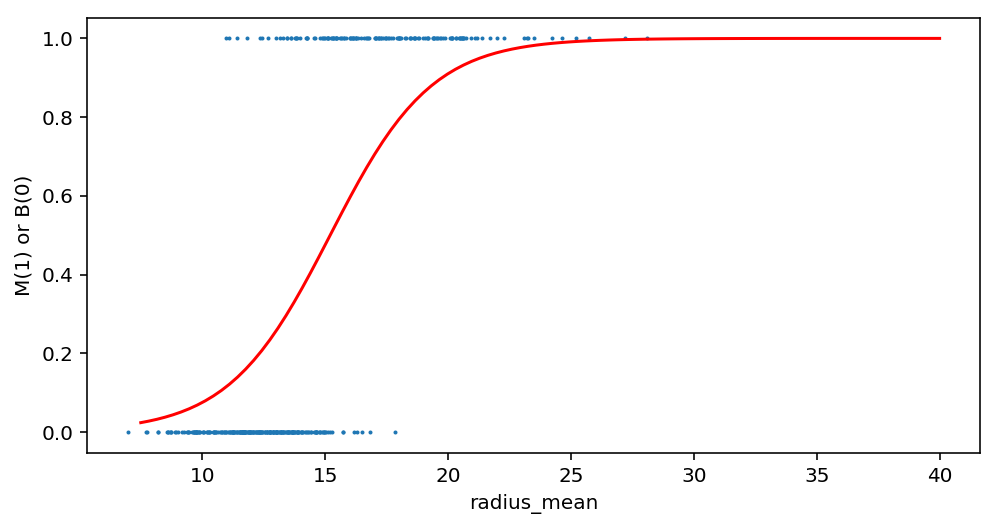

In [110]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logreg(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [111]:
features = ["texture_mean"]            # standard deviation
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 66.08%


C:\Users\rta_note\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
print(model.coef_)
print(model.intercept_)

[[0.17814003]]
[-3.99279766]


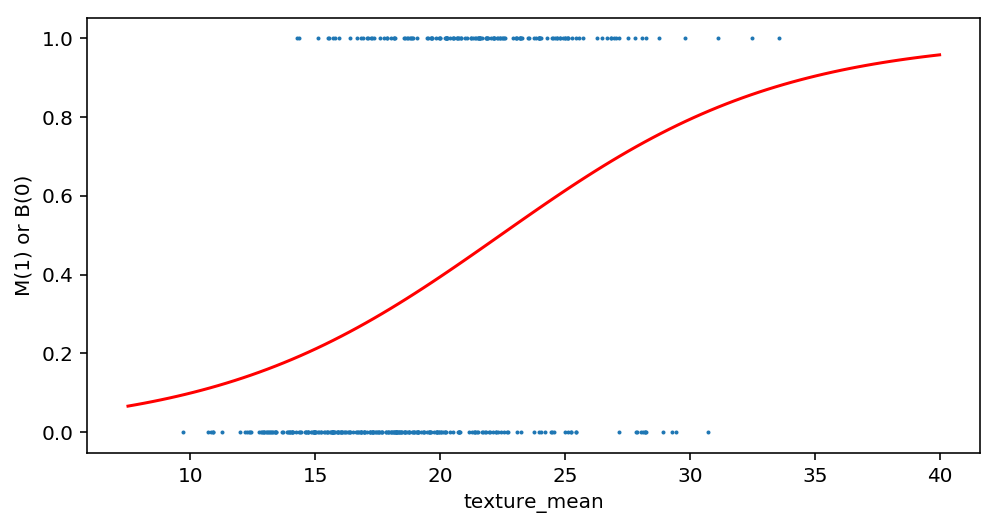

In [113]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [114]:
features = ["radius_mean", "texture_mean"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 88.89%


C:\Users\rta_note\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'texture_mean')

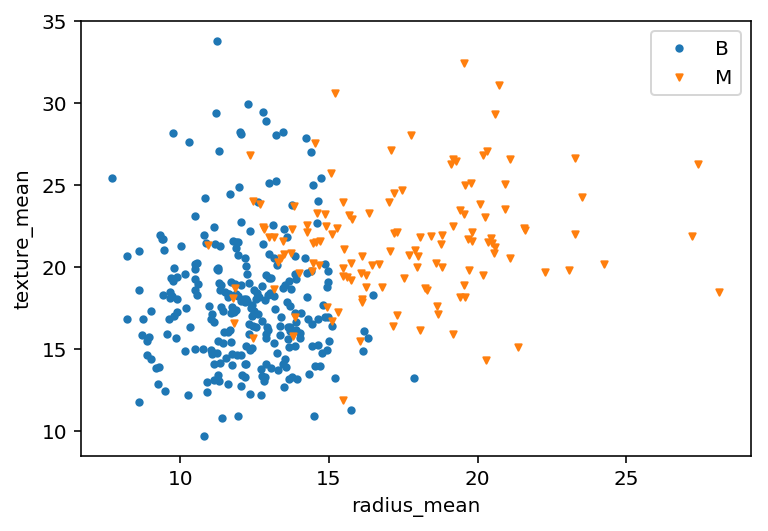

In [115]:
markers = ['o', 'v']
label = ["B", "M"]         # 양성, 악성
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]
    ys = X_train["texture_mean"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

Score: 92.40%


C:\Users\rta_note\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'perimeter_worst')

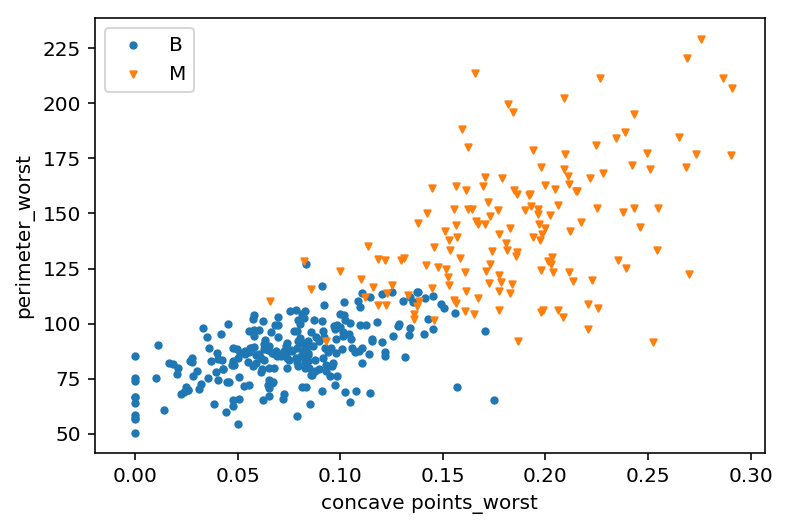

In [118]:
# one more time with two most correlated features
# 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst']
features = ["concave points_worst", "perimeter_worst"]

X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

markers = ['o', 'v']
label = ["B", "M"]         # 양성, 악성
for i in range(2):
    xs = X_train["concave points_worst"][y_train == i]
    ys = X_train["perimeter_worst"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("concave points_worst")
plt.ylabel("perimeter_worst")

### 모든 feature 들을 이용해서 로지스틱 회귀 분석

In [97]:
# 모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행
data_org = data
data.drop('id',axis=1,inplace=True)
# data.drop('Unnamed: 32',axis=1,inplace=True)
X=data.drop('diagnosis', axis=1)

In [98]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
print("Score: {0:.2%}".format(model_all.score(X_test, y_test)))

Score: 93.57%


C:\Users\rta_note\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 90.06%
K =  3 -> Score: 91.81%
K =  5 -> Score: 93.57%
K =  7 -> Score: 92.98%
K =  9 -> Score: 92.98%
K =  11 -> Score: 92.40%
K =  13 -> Score: 92.40%
K =  15 -> Score: 91.81%
K =  17 -> Score: 91.81%
K =  19 -> Score: 91.81%


In [51]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 92.98%


In [52]:
'''randomforest: A random forest is a meta estimator that fits a number of decision 
tree classifiers on various sub-samples of the dataset and uses averaging to 
improve the predictive accuracy and control over-fitting. The sub-sample size is 
always the same as the original input sample size but the samples are drawn with 
replacement if bootstrap=True (default).
'''

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)    # no. of trees
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

랜덤포레스트 : 96.49%


In [ ]:
# one more observation - to use features of two largest correlation values


## 소프트맥스
- 다항 로지스틱스

In [53]:
score = [-1, -0.5, 1.0, 1.5]

prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.045 0.074 0.333 0.548]
